In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loss_simulator import simulate_empirical_risk

# Set style
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

# Empirical Risk Visualization

This notebook visualizes the empirical risk R̂(θ) as a function of the confidence threshold θ for different instability parameters.

**Key concepts:**
- **Instability parameter** (0 to 1): Controls deviation from monotonicity
  - 0 = perfectly monotone (higher confidence → lower error)
  - 1 = maximum instability (no correlation between confidence and accuracy)
- **Empirical risk**: Average loss over the dataset
- **Target α**: Risk level we want to control (shown as horizontal line)

In [35]:
# Parameters
n = 500  # number of datapoints
alpha = 0.1  # target risk level
base_strength = 5

# Instability parameters to test
instability_parameters = [0.1, 0.5, 0.9, 1]

# Create theta grid for visualization
theta_grid = np.linspace(0, 1, 1000)

print(f"Simulating empirical risk for {len(instability_parameters)} instability levels...")
print(f"Dataset size: n = {n}")
print(f"Target risk: α = {alpha}")
print(f"Base strength: {base_strength}")

Simulating empirical risk for 4 instability levels...
Dataset size: n = 500
Target risk: α = 0.1
Base strength: 5


Instability = 0.1: Error rate = 0.444, Risk range = [0.098, 0.444]
Instability = 0.5: Error rate = 0.294, Risk range = [0.092, 0.294]
Instability = 0.9: Error rate = 0.158, Risk range = [0.097, 0.158]
Instability = 1.0: Error rate = 0.108, Risk range = [0.096, 0.109]


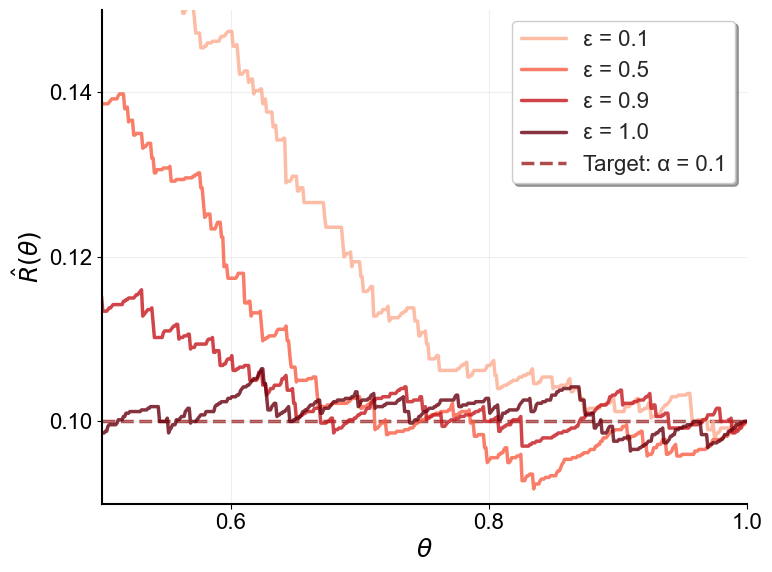

In [36]:
# Create figure with seaborn styling
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Create black to red gradient (increasing instability = more red)
colors = plt.cm.Reds(np.linspace(0.3, 1.0, len(instability_parameters)))

# Simulate and plot for each instability parameter
for idx, instability_parameter in enumerate(instability_parameters):
    # Simulate empirical risk
    P_hat, E, empirical_risk = simulate_empirical_risk(
        n, alpha, theta_grid, instability_parameter, base_strength=base_strength
    )
    
    # Create label
    label = f'ε = {instability_parameter:.1f}'
    if instability_parameter == 0:
        label += ' (monotone)'
    
    # Plot with seaborn-compatible styling
    ax.plot(theta_grid, empirical_risk, linewidth=2.5, 
            color=colors[idx], label=label, alpha=0.8)
    
    # Print summary statistics
    print(f"Instability = {instability_parameter:.1f}: "
          f"Error rate = {E.mean():.3f}, "
          f"Risk range = [{empirical_risk.min():.3f}, {empirical_risk.max():.3f}]")

# Add target risk line
ax.axhline(y=alpha, color='darkred', linestyle='--', linewidth=2.5, 
           label=f'Target: α = {alpha}', zorder=0, alpha=0.7)

# Formatting
ax.set_xlabel(r'$\theta$', fontsize=18, color='black')
ax.set_ylabel(r'$\hat{R}(\theta)$', fontsize=18, color='black')
ax.legend(fontsize=16, loc='best', frameon=True, shadow=True)
ax.grid(True, alpha=0.3)
ax.set_xlim([0.5, 1])
ax.set_ylim([0.09,0.15])

# Reduce number of ticks significantly for better readability at smaller sizes
ax.locator_params(axis='x', nbins=3)
ax.locator_params(axis='y', nbins=4)

# Add ticks on bottom and left only
ax.tick_params(axis='x', colors='black', which='both', bottom=True, top=False, labelsize=16)
ax.tick_params(axis='y', colors='black', which='both', left=True, right=False, labelsize=16)

# Despine top and right, make remaining spines black
sns.despine(ax=ax, top=True, right=True)
for spine in ['bottom', 'left']:
    ax.spines[spine].set_edgecolor('black')
    ax.spines[spine].set_linewidth(1.5)

plt.tight_layout()
plt.savefig('./outputs/empirical_risk_instability.pdf', dpi=300, bbox_inches='tight')